<a href="https://colab.research.google.com/github/roldugina/data_analysis_projects/blob/main/Housing_price_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the dataset and importing libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv("https://raw.githubusercontent.com/roldugina/data_analysis_projects/main/Homes%20for%20Sale%20and%20Real%20Estate.csv")

## 2. General dataset overview. Data cleaning (checking for missing values and anomalies)

In [92]:
df.shape

(3360, 8)

In [93]:
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


In [94]:
df.describe()

,Price,Beds,Bath,Sq.Ft
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


### **Checking variable types.**


It is correct that all categorical columns (Address, Description, Place, Website) have object type. Price, Beds, Sq.Ft have integer type.

Bath column has float type, and we have to check if the values are valid.

In [96]:
df['Bath'].unique()

array([3.5, 2. , 2.5, 1. , 3. , 1.5, 4.5, 5. , 6.5, 4. , 5.5, 6. , 7.5,
       8. ])

 There are float values like 3.5, 4.5 etc. Domain knowledge tell us that such values are valid `cause there are houses with full bathrooms and half-bathrooms.

### **Cleaning null values**

There are 2 columns with missing values: Place and Website. These variables are categorical and we cannot fill them, so we have to drop these rows. The number of dropped rows is 17, which is not significant for our future conclusions.

In [97]:
df_cleaned=df.dropna()

In [98]:
len(df_cleaned)-len(df)

-17

### **Cleaning not null values**

Checking for duplicates:

In [99]:
df_cleaned['Address'].duplicated().any()

False

There are no duplicated addresses.





Are there outliers?
To answer this question let`s vizualize the data.

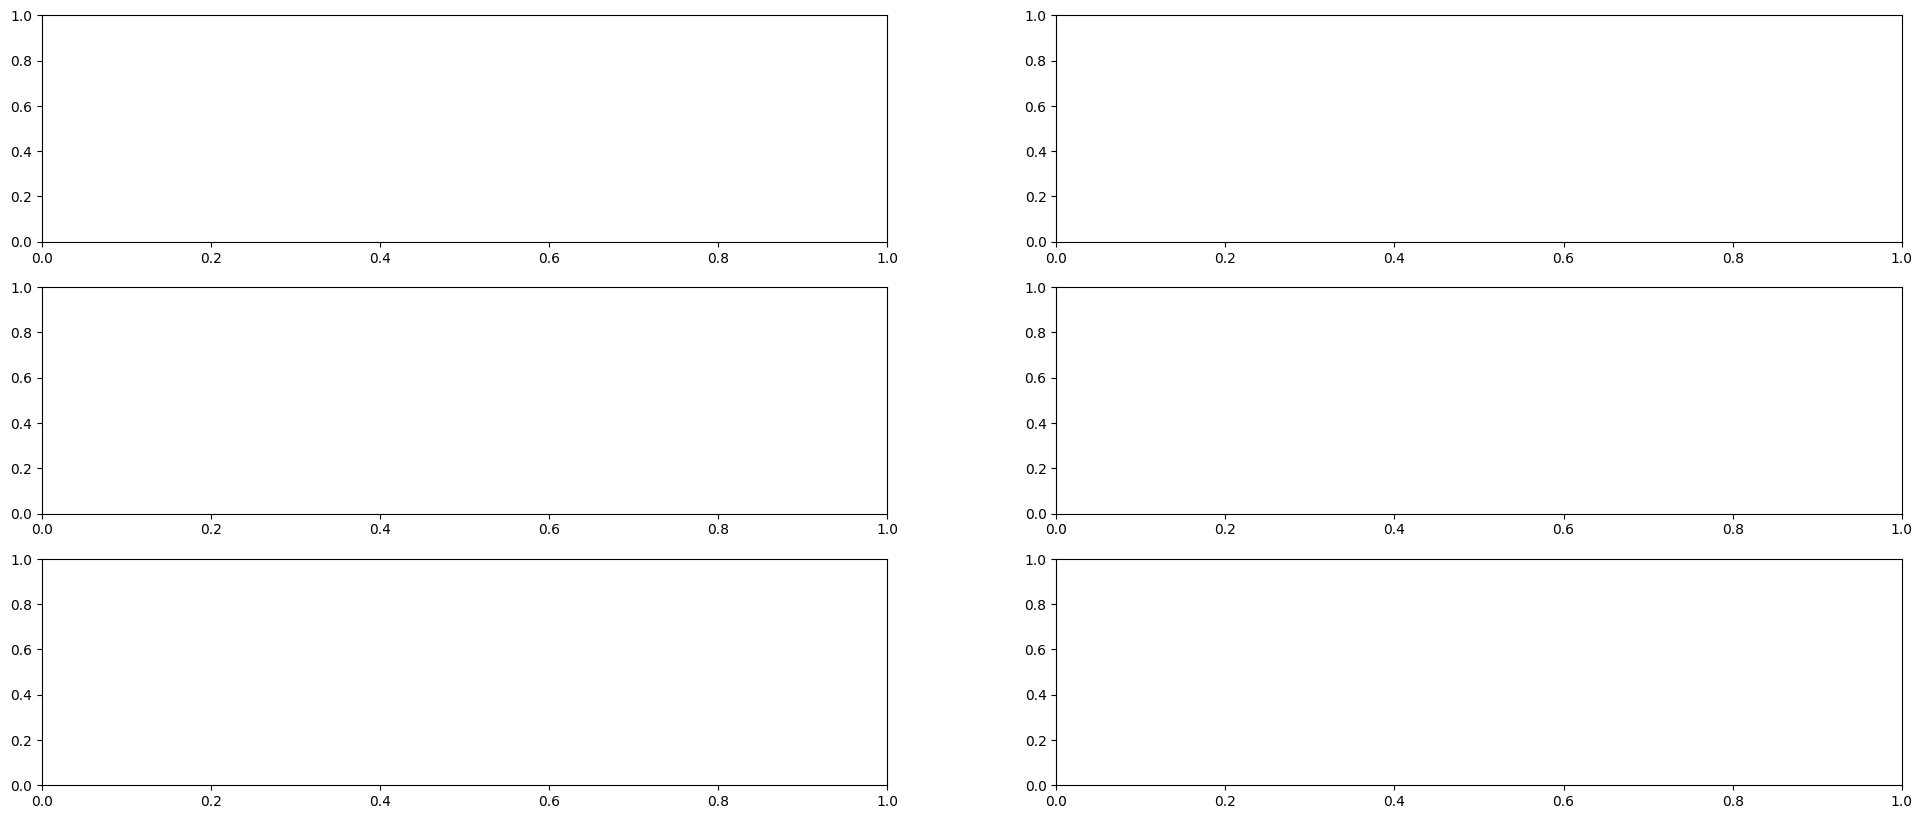

In [100]:
plot_objects = plt.subplots(nrows=3, ncols=2, figsize=(24, 10))
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plot_objects

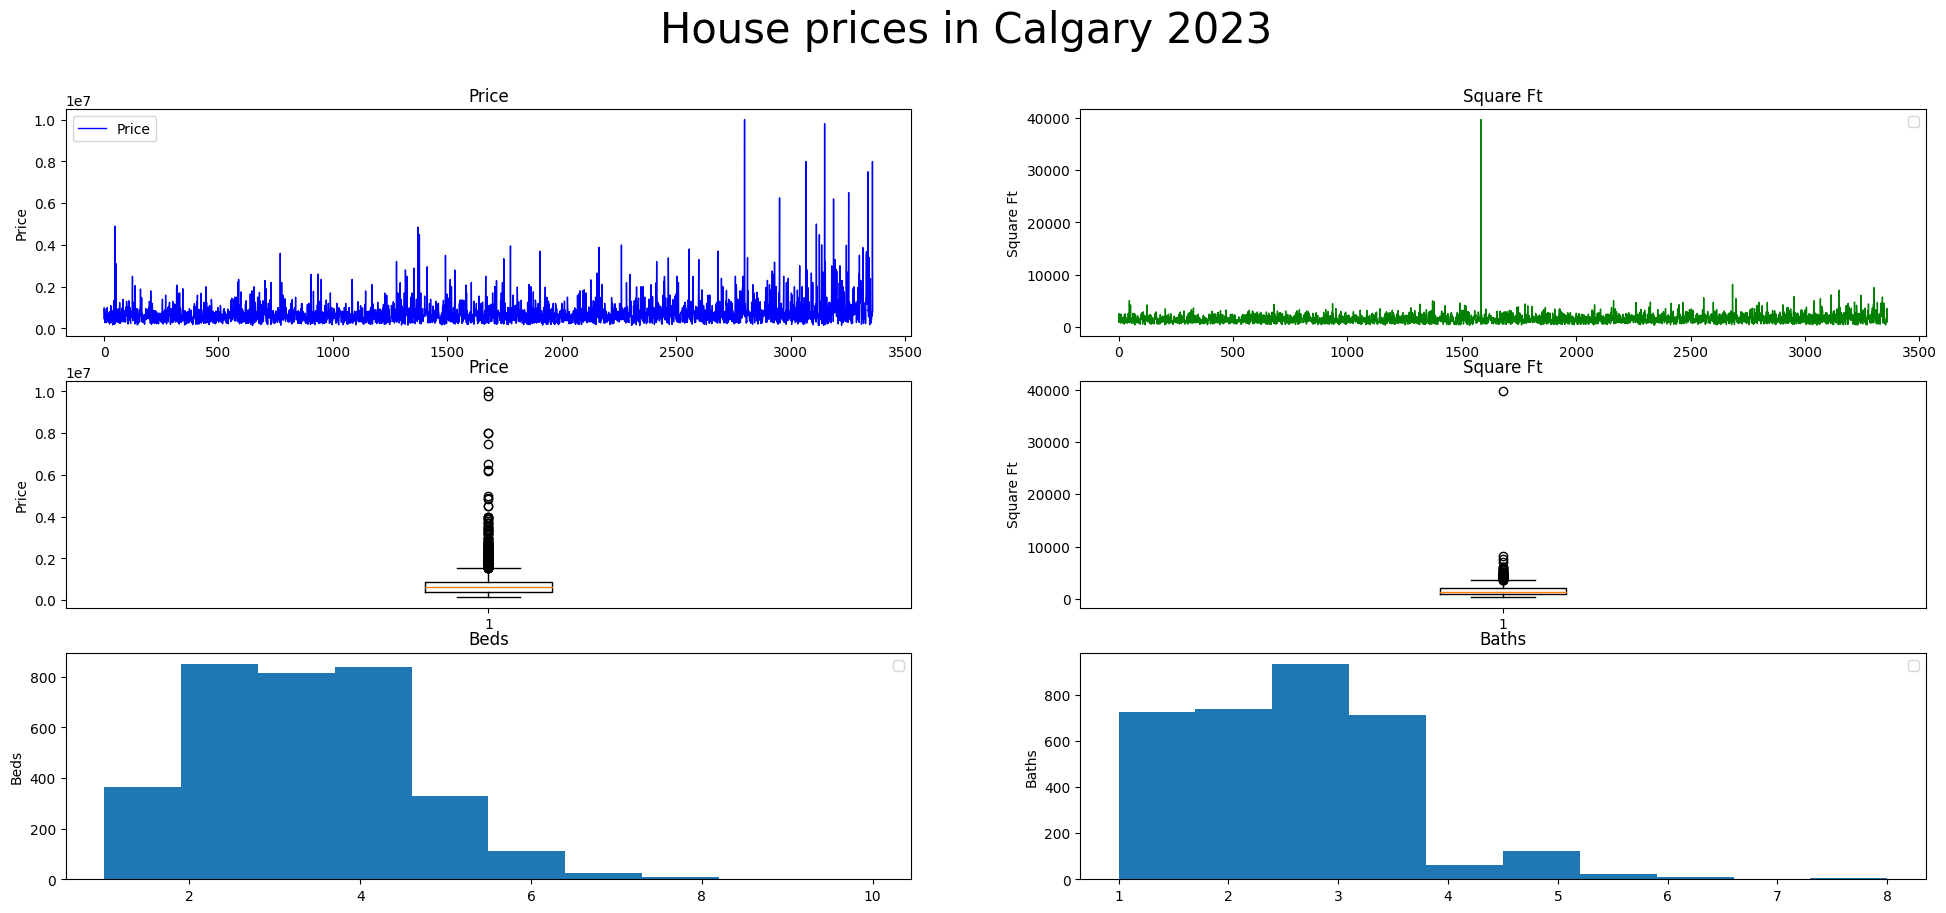

In [101]:
ax1.plot(df_cleaned['Price'],color='blue',linewidth=1,label='Price')
ax2.plot(df_cleaned['Sq.Ft'],color='green',linewidth=1)
ax3.boxplot(df_cleaned['Price'])
ax4.boxplot(df_cleaned['Sq.Ft'])
ax5.hist(df_cleaned['Beds'],bins=10)
ax6.hist(df_cleaned['Bath'],bins=10)


ax1.set_ylabel('Price')
ax2.set_ylabel('Square Ft')
ax3.set_ylabel('Price')
ax4.set_ylabel('Square Ft')
ax5.set_ylabel('Beds')
ax6.set_ylabel('Baths')

ax1.set_title("Price")
ax2.set_title("Square Ft")
ax3.set_title("Price")
ax4.set_title("Square Ft")
ax5.set_title("Number of beds")
ax6.set_title("Number of baths")

ax1.legend()
ax2.legend()
ax5.legend()
ax6.legend()

fig.suptitle('House prices in Calgary 2023',fontsize=30)

fig

Frem the visualization we see that:

1. There are clearly some invalid values in Sq.Ft column (we see a huge spike).
2. Price has outlying data, so we have to check if they are valid in further analysis.
3. The distribution of all variables is skewed left.
4. Most apartments have 1-5 bedrooms, other values are very rare. Most apartments have 1-3.5 bathrooms.

Working with huge spike in Sq.Ft. Locating the outlier:

In [102]:
max_sqft=df_cleaned['Sq.Ft'].max()
max_sqft

39654

In [103]:
mask=df_cleaned['Sq.Ft']==df_cleaned['Sq.Ft'].max()
df_cleaned.loc[mask]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
1584,2012 3 Ave NW,1695000,CA AB T2N 0K2,West Hillhurst,4,3.5,39654,Cir Realty


Seems that we have a fat finger error. Let's drop the row containing this value.

In [104]:
df_cleaned=df_cleaned.drop(df_cleaned.loc[mask].index)

Checking the plot, no spikes.

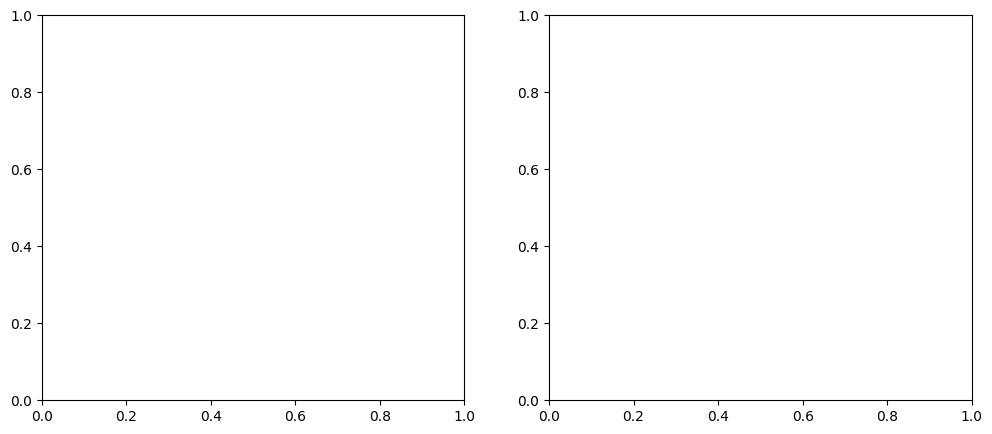

In [112]:
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig,(ax1,ax2)=plot_objects

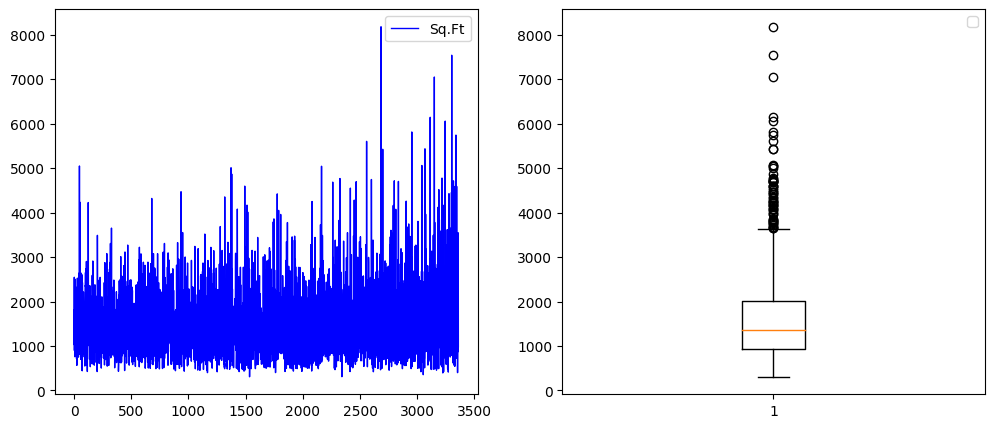

In [113]:
ax1.plot(df_cleaned['Sq.Ft'],color='blue',linewidth=1,label='Sq.Ft')
ax1.legend()
ax2.boxplot(df_cleaned['Sq.Ft'])
ax2.legend()
fig

In [124]:
df_cleaned['Sq.Ft'].sort_values(ascending=False).head(20)

2683    8179
3301    7539
3149    7049
3113    6143
3244    6057
2952    5813
3338    5743
2557    5602
3067    5434
2698    5424
3040    5059
47      5048
2163    5042
1372    5008
1378    4867
3216    4776
2324    4766
2599    4744
2799    4715
3316    4713
Name: Sq.Ft, dtype: int64

Now the data seems to be clean from extreme outliers. We`ll look deeper in EDA.

## 4. Exploratory data analysis

In [114]:
df_cleaned.describe()

,Price,Beds,Bath,Sq.Ft
count,3.342000e+03,3342.000000,3342.000000,3342.000000
mean,7.459752e+05,3.119988,2.475913,1543.077199
std,6.316910e+05,1.347105,1.023052,816.985239
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.982500e+05,2.000000,2.000000,931.250000
50%,6.190000e+05,3.000000,2.500000,1349.000000
75%,8.499000e+05,4.000000,3.500000,2017.750000
max,1.000000e+07,10.000000,8.000000,8179.000000


In [107]:
df['Price_per_square']=df['Price']/df['Sq.Ft']
df['Avg_bed']=df['Sq.Ft']/df['Beds']

In [ ]:
mask_price=df['Price usd per square']>price_upper_limit

In [ ]:
df_cleaned.loc[mask_price]

In [ ]:
mask_beds=df_cleaned['Beds']==1

In [ ]:
df_cleaned[mask_beds]

In [ ]:
df_cleaned['Price usd per square'].sort_values(ascending=False)

In [ ]:
df_cleaned['Avg beds'].sort_values(ascending=False)

In [ ]:
df['Sq.Ft'].plot(figsize=[16,9])

In [ ]:
mask_max_beds=df_cleaned['Avg beds']==df_cleaned['Avg beds'].max()

In [ ]:
df_cleaned.loc[mask_max_beds]

In [ ]:
df_cleaned.loc[1584,'Sq.Ft']=df_cleaned.loc[1584,'Sq.Ft']=3684

In [ ]:
df_cleaned.describe()

In [ ]:
df_cleaned['Price usd']=df_cleaned['Price']/1.33
df_cleaned['Avg beds']=df_cleaned['Sq.M']/df_cleaned['Beds']
df_cleaned['Sq.M']=df_cleaned['Sq.Ft']/10.764
df_cleaned['Price usd per square']=df_cleaned['Price usd']/df_cleaned['Sq.M']

In [ ]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(24, 10))
fig,((ax1,ax2),(ax3,ax4))=plot_objects

In [ ]:
ax1.plot(df_cleaned['Price'],color='blue',linewidth=1,label='Price')
ax2.plot(df_cleaned['Sq.Ft'],color='green',linewidth=1)
ax3.hist(df_cleaned['Avg beds'],bins=100)
ax4.hist(df_cleaned['Beds'],bins=10)


ax1.set_ylabel('Price')
ax2.set_ylabel('Square Ft')

ax1.set_title("Price")
ax2.set_title("Square Ft")
ax1.legend()

fig.suptitle('House prices in Calgary 2023',fontsize=30)

fig